In [1]:
import pandas as pd
import numpy as np
df=pd.read_excel(r'C:\\Users\\Padideh\\Desktop\\DanialMohseni\\MEPKO01\\GDD_PAR_Prediction\\Weather.xlsx')
df

,date,Tmax,Tmin,Precipitation,SRAD
0,2005-01-01,8.9,5.4,0.0,2.90
1,2005-01-02,8.5,4.2,0.2,4.14
2,2005-01-03,7.2,4.6,4.8,2.15
3,2005-01-04,10.5,2.1,0.0,6.17
4,2005-01-05,10.3,3.8,0.5,6.21
...,...,...,...,...,...
7298,2024-12-25,10.3,1.7,0.0,4.62
7299,2024-12-26,9.0,6.3,0.0,3.08
7300,2024-12-27,8.8,6.1,1.2,3.49
7301,2024-12-28,10.0,4.8,0.4,4.19


In [55]:
df['acc_Tmax_M'] = np.nan
df['acc_Tmin_M'] = np.nan
# df['acc_Tmin+Max_M'] = np.nan
for i in range(len(df)):
    df.loc[i, 'acc_Tmax_M'] = df['Tmax'].iloc[max(0, i-29):i+1].sum()
    df.loc[i, 'acc_Tmin_M'] = df['Tmin'].iloc[max(0, i-29):i+1].sum()
    df.loc[i, '(acc_Tmin+Max_M)/2']= (df['Tmin'].iloc[max(0, i-29):i+1].sum()+df['Tmax'].iloc[max(0, i-29):i+1].sum())/2

In [35]:
df

,date,Tmax,Tmin,Precipitation,SRAD,acc_Tmax_M,acc_Tmin_M,(acc_Tmin+Max_M)/2
0,2005-01-01,8.9,5.4,0.0,2.90,8.9,5.4,7.15
1,2005-01-02,8.5,4.2,0.2,4.14,17.4,9.6,13.50
2,2005-01-03,7.2,4.6,4.8,2.15,24.6,14.2,19.40
3,2005-01-04,10.5,2.1,0.0,6.17,35.1,16.3,25.70
4,2005-01-05,10.3,3.8,0.5,6.21,45.4,20.1,32.75
...,...,...,...,...,...,...,...,...
7298,2024-12-25,10.3,1.7,0.0,4.62,316.2,83.6,199.90
7299,2024-12-26,9.0,6.3,0.0,3.08,313.1,79.9,196.50
7300,2024-12-27,8.8,6.1,1.2,3.49,309.0,80.6,194.80
7301,2024-12-28,10.0,4.8,0.4,4.19,309.1,80.3,194.70


In [5]:
df.iloc[:,7]

0         7.15
1        13.50
2        19.40
3        25.70
4        32.75
         ...  
7298    199.90
7299    196.50
7300    194.80
7301    194.70
7302    194.25
Name: (acc_Tmin+Max_M)/2, Length: 7303, dtype: float64

In [213]:
from sklearn.preprocessing import MinMaxScaler
X=df.iloc[:,1:7]
y=df.iloc[:,7]
XX=df.iloc[:,1:8]
scaler = MinMaxScaler()
XX_scaled = scaler.fit_transform(XX)
# y_scaled= scaler.fit_transform(y)

In [4]:
df

,date,Tmax,Tmin,Precipitation,SRAD
0,2005-01-01,8.9,5.4,0.0,2.90
1,2005-01-02,8.5,4.2,0.2,4.14
2,2005-01-03,7.2,4.6,4.8,2.15
3,2005-01-04,10.5,2.1,0.0,6.17
4,2005-01-05,10.3,3.8,0.5,6.21
...,...,...,...,...,...
7298,2024-12-25,10.3,1.7,0.0,4.62
7299,2024-12-26,9.0,6.3,0.0,3.08
7300,2024-12-27,8.8,6.1,1.2,3.49
7301,2024-12-28,10.0,4.8,0.4,4.19


<Axes: >

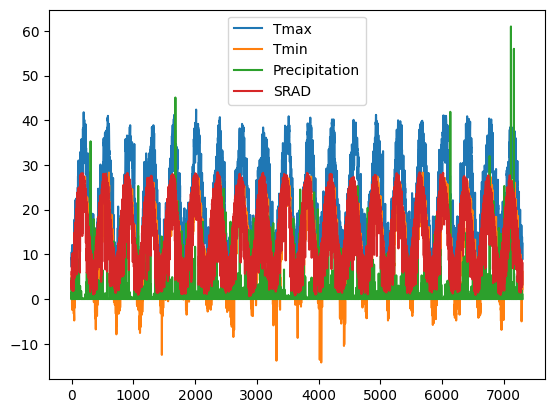

In [6]:
df.drop(columns='date').plot()

In [32]:
df=df.drop(columns='acc_T')

In [51]:
df

,date,Tmax,Tmin,Precipitation,SRAD,acc_Tmax_M,acc_Tmin_M,(acc_Tmin+Max_M)/2
0,2005-01-01,8.9,5.4,0.0,2.90,8.9,5.4,7.15
1,2005-01-02,8.5,4.2,0.2,4.14,17.4,9.6,13.50
2,2005-01-03,7.2,4.6,4.8,2.15,24.6,14.2,19.40
3,2005-01-04,10.5,2.1,0.0,6.17,35.1,16.3,25.70
4,2005-01-05,10.3,3.8,0.5,6.21,45.4,20.1,32.75
...,...,...,...,...,...,...,...,...
7298,2024-12-25,10.3,1.7,0.0,4.62,316.2,83.6,199.90
7299,2024-12-26,9.0,6.3,0.0,3.08,313.1,79.9,196.50
7300,2024-12-27,8.8,6.1,1.2,3.49,309.0,80.6,194.80
7301,2024-12-28,10.0,4.8,0.4,4.19,309.1,80.3,194.70


In [9]:
scaled_df=pd.DataFrame({'Tmax':XX_scaled[:,0],
 'Tmin':XX_scaled[:,1],
 'Precipitation':XX_scaled[:,2],
 'SRAD':XX_scaled[:,3],
 'acc_Tmax_M':XX_scaled[:,4],
 'acc_Tmin_M':XX_scaled[:,5],
 '(acc_Tmin+Max_M)/2':XX_scaled[:,6],

})

In [95]:
df=scaled_df

In [11]:
feat_cols = ["Tmax","Tmin","Precipitation","SRAD","acc_Tmax_M",
             "acc_Tmin_M"]#(acc_Tmin+Max_M)/2,""]
target    = "(acc_Tmin+Max_M)/2" 

In [73]:
############################################################
# 3.  BUILD ROLLING WINDOWS   (14 past days → 1 forecast)
############################################################
WINDOW = 14
Xs, ys = [], []

for t in range(len(df)-WINDOW):
    past   = df.iloc[t:t+WINDOW][feat_cols].values.T   # (F, T)
    target_bt = df.iloc[t+WINDOW][target]              # scalar
    Xs.append(past)
    ys.append(target_bt)

X = np.stack(Xs)                      # (samples, F, T)
y = np.array(ys).reshape(-1,1)
print("Dataset", X.shape, y.shape)


Dataset (7289, 6, 14) (7289, 1)


In [13]:
############################################################
# 4.  TRAIN / TEST SPLIT  (80 % train)
############################################################
split = int(0.8*len(X))
X_tr, X_te = X[:split], X[split:]
y_tr, y_te = y[:split], y[split:]

import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def to_tensor(a): return torch.tensor(a, dtype=torch.float32)
train_ds = TensorDataset(to_tensor(X_tr), to_tensor(y_tr))
test_ds  = TensorDataset(to_tensor(X_te), to_tensor(y_te))

############################################################
# 5.  1-D CNN MODEL  (multivariate)
############################################################
class BedCNN(nn.Module):
    def __init__(self, f=7):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=f, out_channels=32,
                               kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 32, kernel_size=3, padding=1)
        self.relu  = nn.ReLU()
        self.pool  = nn.AdaptiveMaxPool1d(1)   # squash time dimension
        self.fc    = nn.Linear(32, 1)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.pool(x).squeeze(-1)
        return self.fc(x)

model = BedCNN(f=len(feat_cols))
opt   = optim.Adam(model.parameters(), lr=3e-3)
lossf = nn.MSELoss()


Matplotlib is building the font cache; this may take a moment.


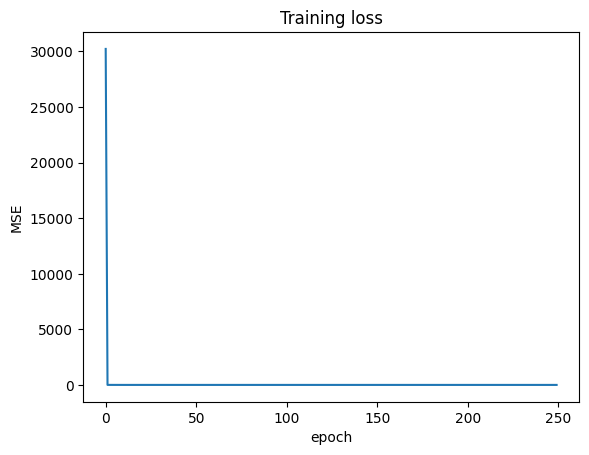

In [15]:
############################################################
# 6.  TRAIN
############################################################
EPOCHS = 250
batch  = 32
train_ld = DataLoader(train_ds, batch_size=batch, shuffle=True)
import matplotlib.pyplot as plt
loss_log = []
for ep in range(EPOCHS):
    model.train(); epoch_loss=0
    for xb,yb in train_ld:
        opt.zero_grad()
        out = model(xb)
        loss = lossf(out, yb)
        loss.backward(); opt.step()
        epoch_loss += loss.item()*len(xb)
    loss_log.append(epoch_loss/len(train_ds))

plt.plot(loss_log); plt.xlabel("epoch"); plt.ylabel("MSE");
plt.title("Training loss");


In [18]:
############################################################
# 7.  EVALUATION
############################################################
model.eval()
with torch.no_grad():
    pred_tr = model(to_tensor(X_tr)).squeeze().numpy()
    pred_te = model(to_tensor(X_te)).squeeze().numpy()

from sklearn.metrics import mean_absolute_error, r2_score
def stats(true, pred, name):
    print(f"{name:5s}  MAE = {mean_absolute_error(true,pred):.2f} h   "
          f"R² = {r2_score(true,pred):.3f}")
stats(y_tr.squeeze(), pred_tr, "Train")
stats(y_te.squeeze(), pred_te, "Test")


Train  MAE = 3.68 h   R² = 1.000
Test   MAE = 4.11 h   R² = 1.000


In [19]:
df['Day']=df.index

In [102]:
df

,Tmax,Tmin,Precipitation,SRAD,acc_Tmax_M,acc_Tmin_M,(acc_Tmin+Max_M)/2,Day
0,0.257206,0.461176,0.000000,0.081743,0.000000,0.141254,0.010754,0
1,0.248337,0.432941,0.003279,0.126395,0.007494,0.146113,0.017516,1
2,0.219512,0.442353,0.078689,0.054735,0.013842,0.151435,0.023798,2
3,0.292683,0.383529,0.000000,0.199496,0.023100,0.153864,0.030506,3
4,0.288248,0.423529,0.008197,0.200936,0.032181,0.158260,0.038013,4
...,...,...,...,...,...,...,...,...
7298,0.288248,0.374118,0.000000,0.143680,0.270940,0.231721,0.215993,7298
7299,0.259424,0.482353,0.000000,0.088225,0.268207,0.227441,0.212373,7299
7300,0.254989,0.477647,0.019672,0.102989,0.264592,0.228251,0.210563,7300
7301,0.281596,0.447059,0.006557,0.128196,0.264680,0.227904,0.210456,7301


In [106]:
df.to_numpy

,Tmax,Tmin,Precipitation,SRAD,acc_Tmax_M,acc_Tmin_M,(acc_Tmin+Max_M)/2,Day
0,0.257206,0.461176,0.000000,0.081743,0.000000,0.141254,0.010754,0
1,0.248337,0.432941,0.003279,0.126395,0.007494,0.146113,0.017516,1
2,0.219512,0.442353,0.078689,0.054735,0.013842,0.151435,0.023798,2
3,0.292683,0.383529,0.000000,0.199496,0.023100,0.153864,0.030506,3
4,0.288248,0.423529,0.008197,0.200936,0.032181,0.158260,0.038013,4
...,...,...,...,...,...,...,...,...
7298,0.288248,0.374118,0.000000,0.143680,0.270940,0.231721,0.215993,7298
7299,0.259424,0.482353,0.000000,0.088225,0.268207,0.227441,0.212373,7299
7300,0.254989,0.477647,0.019672,0.102989,0.264592,0.228251,0.210563,7300
7301,0.281596,0.447059,0.006557,0.128196,0.264680,0.227904,0.210456,7301


In [105]:
pred_te

array([0.15430062, 0.14971372, 0.1420358 , ..., 0.20595646, 0.20504735,
       0.20617633], dtype=float32)

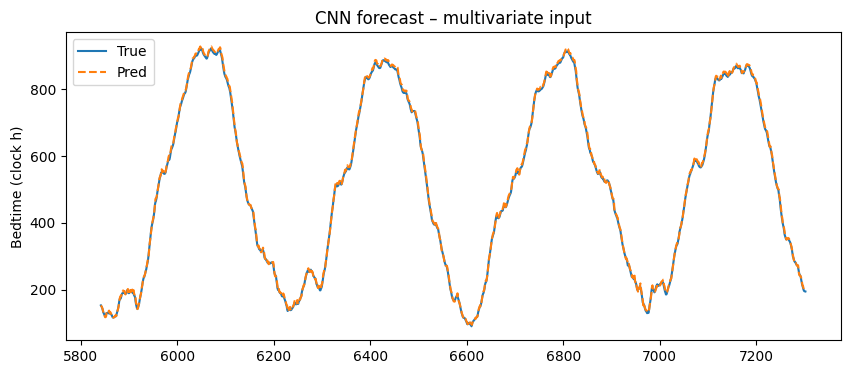

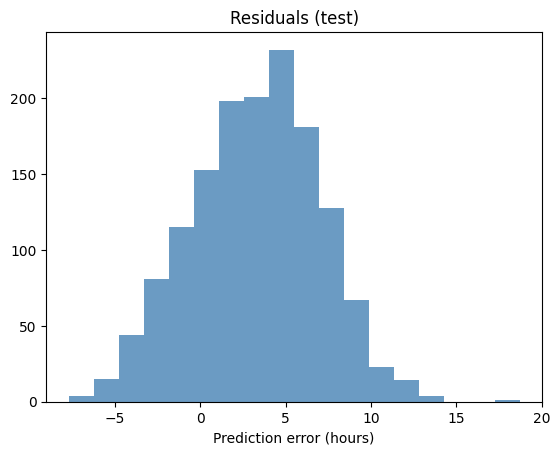

In [20]:
############################################################
# 8.  VISUALISE  true vs predicted (test split)
############################################################
t_idx = df.Day[WINDOW+split:]               # align with test points
plt.figure(figsize=(10,4))
plt.plot(t_idx, y_te.squeeze(),  label="True")
plt.plot(t_idx, pred_te, '--',   label="Pred")
plt.ylabel("Bedtime (clock h)")
plt.title("CNN forecast – multivariate input")
plt.legend(); plt.show()

# Residuals
res = pred_te - y_te.squeeze()
plt.hist(res, bins=18, color="steelblue", alpha=.8)
plt.xlabel("Prediction error (hours)")
plt.title("Residuals (test)"); plt.show()


# CNN + LSTM ≈ the best of both worlds

In [112]:
# X.shape = (samples, F, T) from previous cell
WINDOW = 1                       # 14-day window ➟ predict day +1 bedtime
F      = len(feat_cols)           # 7 features


In [111]:
feat_cols

['acc_Tmax', 'acc_Tmin', 'Percipitation', 'S_RAD']

# Class Definition

 class CNN_LSTM(nn.Module):
    def __init__(self, f):
        super().__init__()



Defines a PyTorch neural network class inheriting from nn.Module.

f is the number of input channels/features per time step (e.g., f=6 if your input shape is [batch, 6, T]).

super().__init__() initializes the base class.

In [165]:
X.shape

(240, 4, 1)

In [166]:
y.shape

(240, 1)

In [224]:
df=df_acc_m_T.copy()
XX_scaled = scaler.fit_transform(df)

In [225]:
df=df.drop(columns=['level_0','index','date'])

In [220]:
XX_scaled

array([[0.        , 0.        , 0.        , ..., 0.15726179, 0.15726179,
        0.        ],
       [0.00416667, 0.00416667, 0.00416667, ..., 0.20074006, 0.20074006,
        0.00416667],
       [0.00833333, 0.00833333, 0.00833333, ..., 0.34875116, 0.34875116,
        0.00833333],
       ...,
       [0.99166667, 0.99166667, 0.99166667, ..., 0.22849214, 0.22849214,
        0.99166667],
       [0.99583333, 0.99583333, 0.99583333, ..., 0.29232192, 0.29232192,
        0.99583333],
       [1.        , 1.        , 1.        , ..., 0.20351526, 0.20351526,
        1.        ]], shape=(241, 9))

In [221]:
import torch.nn as nn, torch

class CNN_LSTM(nn.Module):
    def __init__(self, f):
        super().__init__()
        # ---------- 1-D conv stack (local feature maps) ----------
        self.conv1 = nn.Conv1d(f, 128, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(128, 128, kernel_size=3, padding=1)
        self.relu  = nn.ReLU()
        self.conv3 = nn.Conv1d(128, 128, kernel_size=3, padding=1)
        self.pool  = nn.AdaptiveMaxPool1d(output_size=2)#kernel_size=2)   # seq T=14 → 7

        # ---------- LSTM over compressed sequence ----------
        # Input dim = 64 (# conv channels)
        self.lstm  = nn.LSTM(input_size=128, hidden_size=128,
                             num_layers=5, batch_first=True)

        # ---------- regression head ----------
        self.fc = nn.Linear(128, 1)

    def forward(self, x):
        """
        x: (batch, F, T)
        """
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)              # (batch, 64, T/2 = 7)
        x = x.transpose(1, 2)         # LSTM expects (batch, seq, feat)
        _, (h_n, _) = self.lstm(x)    # h_n: (1, batch, 64)
        # h = h_n.squeeze(0)
        h = h_n[-1]  # Take the last layer's hidden state: (batch, 64)
        return self.fc(h)


# 1D Convolution Stack

```python
self.conv1 = nn.Conv1d(f, 32, kernel_size=3, padding=1)
self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
self.relu  = nn.ReLU()
self.pool  = nn.AdaptiveMaxPool1d(output_size=2)
```
conv1:

1D convolution layer

Input channels: f (number of features in your input)

Output channels: 32 filters

Kernel size 3 means the convolution looks at 3 time steps at a time

Padding=1 keeps the sequence length same after convolution (padding on each side)

conv2:

Takes 32 channels from conv1 and outputs 64 channels

Same kernel and padding as above

ReLU activation: Applies element-wise nonlinear activation to introduce nonlinearity.

AdaptiveMaxPool1d:

Pools the output along the time dimension

output_size=2 means the output will be compressed to length 2, regardless of input length

Adaptive pooling automatically calculates pooling size/stride to output a fixed length of 2 time steps



In [ ]:
df=df.drop(columns='date')

,date,Tmax,Tmin,Precipitation,SRAD,acc_Tmax_M,acc_Tmin_M,(acc_Tmin+Max_M)/2
0,2005-01-01,8.9,5.4,0.0,2.90,8.9,5.4,7.15
1,2005-01-02,8.5,4.2,0.2,4.14,17.4,9.6,13.50
2,2005-01-03,7.2,4.6,4.8,2.15,24.6,14.2,19.40
3,2005-01-04,10.5,2.1,0.0,6.17,35.1,16.3,25.70
4,2005-01-05,10.3,3.8,0.5,6.21,45.4,20.1,32.75
...,...,...,...,...,...,...,...,...
7298,2024-12-25,10.3,1.7,0.0,4.62,316.2,83.6,199.90
7299,2024-12-26,9.0,6.3,0.0,3.08,313.1,79.9,196.50
7300,2024-12-27,8.8,6.1,1.2,3.49,309.0,80.6,194.80
7301,2024-12-28,10.0,4.8,0.4,4.19,309.1,80.3,194.70


# LSTM Layer

```python
self.lstm  = nn.LSTM(input_size=64, hidden_size=64,
                     num_layers=1, batch_first=True)

```
input_size=64: The LSTM input size matches the number of channels output by the conv stack (conv2 outputs 64 channels).

hidden_size=64: LSTM outputs hidden state vectors of length 64.

num_layers=1: Single-layer LSTM.

batch_first=True: The input to LSTM is expected in shape [batch, seq_len, features].

# Fully Connected Layer (Regression Head)
```python
self.fc = nn.Linear(64, 1)
```
Takes the final hidden state of LSTM (64 features) and outputs a single number (regression output).

# Forward Pass
```python
def forward(self, x):
    """
    x: (batch, F, T)
    """
    x = self.relu(self.conv1(x))
    x = self.relu(self.conv2(x))
    x = self.pool(x)              # (batch, 64, 2)
    x = x.transpose(1, 2)         # reshape to (batch, seq_len=2, features=64)
    _, (h_n, _) = self.lstm(x)    # h_n shape: (num_layers=1, batch, 64)
    h = h_n.squeeze(0)            # remove the layers dimension → (batch, 64)
    return self.fc(h)             # output shape: (batch, 1)

```
Input x shape: [batch, F, T], where

batch = number of samples in batch

F = number of input channels/features (like 6)

T = sequence length (time steps)

conv1 and conv2: extract features along the time dimension with nonlinear activation.

pool: compress the time dimension down to length 2 (no matter original length).

transpose(1, 2): Reorders dimensions to [batch, seq_len, features] for LSTM.
Now seq_len=2, and features=64 (channels from conv layer).

LSTM processes the sequence and returns hidden states:

_ is output for all time steps (not used here)

h_n is the hidden state for the last time step, shape [num_layers, batch, hidden_size]

squeeze(0) removes the layer dimension since there's only 1 layer → shape [batch, hidden_size]

Fully connected layer fc maps the hidden state to a single output per sample.


In [227]:
model  = CNN_LSTM(F).to('cpu')
opt    = torch.optim.Adam(model.parameters(), lr=2e-3)
lossfn = nn.MSELoss()

EPOCHS = 1000#250
loss_hist = []
for ep in range(EPOCHS):
    model.train(); running = 0
    for xb, yb in DataLoader(train_ds, batch_size=128, shuffle=True):
        opt.zero_grad()# clear previous gradients
        pred = model(xb) # forward pass
        loss = lossfn(pred, yb) # compute loss
        loss.backward();# update weights
        opt.step()# update weights
        running += loss.item()*len(xb)
    loss_hist.append(running/len(train_ds))


KeyError: 228

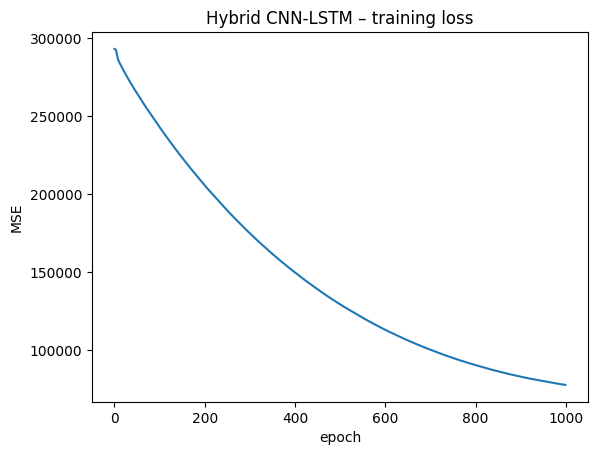

In [193]:
plt.plot(loss_hist); plt.xlabel('epoch'); plt.ylabel('MSE')
plt.title('Hybrid CNN-LSTM – training loss');


In [198]:
import torch
import torch.nn as nn

def train(model, dataloader, optimizer, loss_fn=nn.MSELoss(), epochs=5, device='cpu'):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for xb, yb in dataloader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * xb.size(0)
        epoch_loss = running_loss / len(dataloader.dataset)
        print(f"Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f}")


In [200]:
def evaluate(model, dataloader, loss_fn=nn.MSELoss(), device='cpu'):
    model.eval()
    running_loss = 0
    with torch.no_grad():
        for xb, yb in dataloader:
            xb, yb = xb.to(device), yb.to(device)
            preds = model(xb)
            loss = loss_fn(preds, yb)
            running_loss += loss.item() * xb.size(0)
    return running_loss / len(dataloader.dataset)


In [204]:
from torch.utils.data import random_split

# Assuming full_ds is your complete dataset
train_size = int(0.8 * len(df_acc_m_T))  # 80% for training
val_size = len(df_acc_m_T) - train_size  # 20% for validation

train_ds, val_ds = random_split(df_acc_m_T, [train_size, val_size])


In [209]:
best_val_loss = float('inf')
best_params = {}

for lr in [1e-3, 1e-4]:
    for batch_size in [32, 64]:
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        val_dl = DataLoader(val_ds, batch_size=batch_size)
        
        model = CNN_LSTM(f=F).to('cpu')
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        train(model, train_dl, optimizer, epochs=5, device='cpu')
        val_loss = evaluate(model, val_dl, device='cpu')
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = {'lr': lr, 'batch_size': batch_size}

print(f"Best params: {best_params} with val_loss={best_val_loss:.4f}")


KeyError: 113

In [201]:
best_val_loss = float('inf')
best_params = {}

for lr in [1e-3, 1e-4]:
    for batch_size in [32, 64]:
        # Prepare data loader with batch_size
        train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
        
        # Initialize model, optimizer with lr
        model = CNN_LSTM(f=F).to('cpu')
        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        
        # Train model (few epochs for quick eval)
        train(model, train_dl, optimizer, epochs=5)
        
        val_loss = evaluate(model, val_dl)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = {'lr': lr, 'batch_size': batch_size}

print(f'Best params: {best_params} with val_loss={best_val_loss:.4f}')


Epoch 1/5 - Loss: 292918.7031
Epoch 2/5 - Loss: 292706.8229
Epoch 3/5 - Loss: 291737.2344
Epoch 4/5 - Loss: 289428.6667
Epoch 5/5 - Loss: 287215.6172


NameError: name 'val_dl' is not defined

# Summary
Input: [batch, features, time_steps]

Conv layers: extract local time-dependent features, increase channel depth from f to 64.

Pooling: compress time dimension to length 2.

LSTM: learn temporal dependencies on the compressed sequence.

Output: regression value (single float) per sample.

In [194]:
model.eval()
with torch.no_grad():
    pred_tr = model(to_tensor(X_tr)).squeeze().numpy()
    pred_te = model(to_tensor(X_te)).squeeze().numpy()

from sklearn.metrics import mean_absolute_error, r2_score
def report(y_true, y_pred, name):
    print(f'{name}  MAE={mean_absolute_error(y_true,y_pred):.2f} h  '
          f'R²={r2_score(y_true,y_pred):.3f}')
report(y_tr.squeeze(), pred_tr,'Train')
report(y_te.squeeze(), pred_te,'Test')


Train  MAE=236.55 h  R²=-0.149
Test  MAE=249.88 h  R²=-0.252


In [162]:
df['Day']=df.index

In [180]:
df_acc_m_T['Day']=df_acc_m_T.index

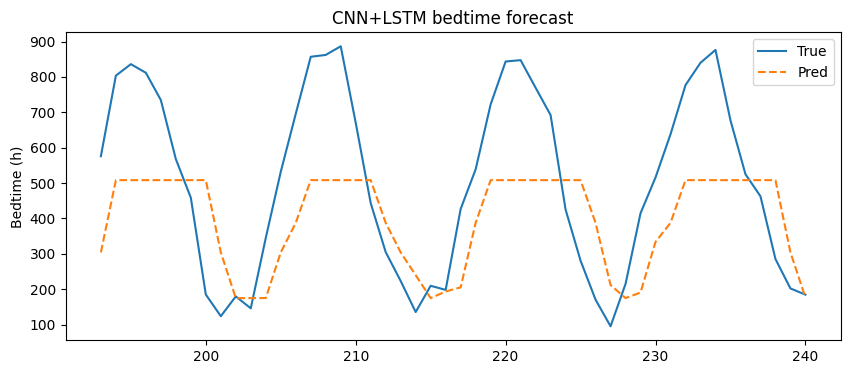

In [181]:
# Plot test predictions
t_idx = df_acc_m_T.Day[WINDOW+split:]
plt.figure(figsize=(10,4))
plt.plot(t_idx, y_te.squeeze(), label='True')
plt.plot(t_idx, pred_te, '--',  label='Pred')
plt.title('CNN+LSTM bedtime forecast'); plt.ylabel('Bedtime (h)'); plt.legend();


In [123]:
df

,date,Tmax,Tmin,Precipitation,SRAD,acc_Tmax_M,acc_Tmin_M,(acc_Tmin+Max_M)/2,Day
0,2005-01-01,8.9,5.4,0.0,2.90,8.9,5.4,7.15,0
1,2005-01-02,8.5,4.2,0.2,4.14,17.4,9.6,13.50,1
2,2005-01-03,7.2,4.6,4.8,2.15,24.6,14.2,19.40,2
3,2005-01-04,10.5,2.1,0.0,6.17,35.1,16.3,25.70,3
4,2005-01-05,10.3,3.8,0.5,6.21,45.4,20.1,32.75,4
...,...,...,...,...,...,...,...,...,...
7298,2024-12-25,10.3,1.7,0.0,4.62,316.2,83.6,199.90,7298
7299,2024-12-26,9.0,6.3,0.0,3.08,313.1,79.9,196.50,7299
7300,2024-12-27,8.8,6.1,1.2,3.49,309.0,80.6,194.80,7300
7301,2024-12-28,10.0,4.8,0.4,4.19,309.1,80.3,194.70,7301


## CNN

In [53]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# 1. Generate synthetic multivariate time series
# def generate_data(seq_len=2000):
#     t = np.linspace(0, 100, seq_len)
#     f1 = np.sin(t)
#     f2 = np.cos(t + 0.5)
#     f3 = np.sin(t) + np.cos(t + 0.5) + np.random.normal(0, 0.1, size=len(t))
#     data = np.stack([f1, f2, f3], axis=1)
#     return data

# 2. Prepare dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, data, input_len, pred_len):
        self.data = data
        self.input_len = input_len
        self.pred_len = pred_len

    def __len__(self):
        return len(self.data) - self.input_len - self.pred_len

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.input_len]
        y = self.data[idx+self.input_len:idx+self.input_len+self.pred_len]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

# 3. Define LSTM-CNN hybrid model
class LSTM_CNN_Model(nn.Module):
    def __init__(self, input_dim, hidden_dim, cnn_out_channels, kernel_size, output_dim, num_layers=1):
        super(LSTM_CNN_Model, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.conv1d = nn.Conv1d(hidden_dim, cnn_out_channels, kernel_size=kernel_size, padding='same')
        self.relu = nn.ReLU()
        self.fc = nn.Linear(cnn_out_channels, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # (batch, seq_len, hidden_dim)
        conv_input = lstm_out.permute(0, 2, 1)  # (batch, hidden_dim, seq_len)
        conv_out = self.relu(self.conv1d(conv_input))  # (batch, cnn_out_channels, seq_len)
        conv_out = conv_out.permute(0, 2, 1)  # (batch, seq_len, cnn_out_channels)
        last_step = conv_out[:, -1, :]  # Only use last time step
        output = self.fc(last_step)  # (batch, output_dim)
        return output

# 4. Hyperparameters and Training
input_len = 50
pred_len = 3
hidden_dim = 512
cnn_channels = 32
kernel_size = 3
batch_size = 32
epochs = 20

data = df.drop(columns=['date','Day']).to_numpy()
dataset = TimeSeriesDataset(data, input_len, pred_len)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# model = LSTM_CNN_Model(input_dim=3, hidden_dim=hidden_dim, cnn_out_channels=cnn_channels,
#                        kernel_size=kernel_size, output_dim=3*pred_len)
model = LSTM_CNN_Model(
    input_dim=7,
    hidden_dim=hidden_dim,
    cnn_out_channels=cnn_channels,
    kernel_size=kernel_size,
    output_dim=1# * pred_len  # This must match!
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# 5. Training loop
loss_history = []
for epoch in range(epochs):
    total_loss = 0
    for x_batch, y_batch in dataloader:
        pred = model(x_batch)
        y_batch_flat = y_batch.view(x_batch.size(0), -1)  # flatten for multi-step
        # print([y_batch_flat.shape,pred.shape])
        loss = loss_fn(pred, y_batch_flat)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    # print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss / len(dataloader):.4f}")
    avg_loss = total_loss / len(dataloader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
plt.figure(figsize=(8, 4))
plt.plot(loss_history, label='Training Loss')
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.show()



# Optional: Plot predictions
model.eval()
with torch.no_grad():
    x_test, y_test = dataset[0]
    pred = model(x_test.unsqueeze(0))
    print("True:", y_test.numpy().flatten())
    print("Pred:", pred.numpy().flatten())


KeyError: "['Day'] not found in axis"

In [127]:
data

array([[8.9000e+00, 5.4000e+00, 0.0000e+00, ..., 5.4000e+00, 7.1500e+00,
        0.0000e+00],
       [8.5000e+00, 4.2000e+00, 2.0000e-01, ..., 9.6000e+00, 1.3500e+01,
        1.0000e+00],
       [7.2000e+00, 4.6000e+00, 4.8000e+00, ..., 1.4200e+01, 1.9400e+01,
        2.0000e+00],
       ...,
       [8.8000e+00, 6.1000e+00, 1.2000e+00, ..., 8.0600e+01, 1.9480e+02,
        7.3000e+03],
       [1.0000e+01, 4.8000e+00, 4.0000e-01, ..., 8.0300e+01, 1.9470e+02,
        7.3010e+03],
       [1.2400e+01, 2.2000e+00, 0.0000e+00, ..., 7.9500e+01, 1.9425e+02,
        7.3020e+03]])

In [130]:
df.drop(columns=['Day','date'])

,Tmax,Tmin,Precipitation,SRAD,acc_Tmax_M,acc_Tmin_M,(acc_Tmin+Max_M)/2
0,8.9,5.4,0.0,2.90,8.9,5.4,7.15
1,8.5,4.2,0.2,4.14,17.4,9.6,13.50
2,7.2,4.6,4.8,2.15,24.6,14.2,19.40
3,10.5,2.1,0.0,6.17,35.1,16.3,25.70
4,10.3,3.8,0.5,6.21,45.4,20.1,32.75
...,...,...,...,...,...,...,...
7298,10.3,1.7,0.0,4.62,316.2,83.6,199.90
7299,9.0,6.3,0.0,3.08,313.1,79.9,196.50
7300,8.8,6.1,1.2,3.49,309.0,80.6,194.80
7301,10.0,4.8,0.4,4.19,309.1,80.3,194.70


In [136]:
import torch
import torch.nn as nn

# Assume `data` is your time-series tensor with shape (241, 1)
seq_length = 50  # Define sequence length
num_predictions = 6  # Number of future values to predict

# Convert data into input sequences and targets
x_sequences = []
y_targets = []

for i in range(len(data) - seq_length - num_predictions + 1):
    x_sequences.append(data[i:i+seq_length])  # Past `seq_length` values
    y_targets.append(data[i+seq_length:i+seq_length+num_predictions])  # Next `num_predictions` values

# Convert lists to tensors
train_x = torch.stack(x_sequences).unsqueeze(-1)  # Shape: (num_samples, seq_length, 1)
train_y = torch.stack(y_targets)  # Shape: (num_samples, num_predictions)

print(train_x.shape)  # Should be (num_samples, seq_length, 1)
print(train_y.shape)  # Should be (num_samples, num_predictions)


TypeError: expected Tensor as element 0 in argument 0, but got numpy.ndarray

In [137]:
seq_length = 50  # Number of timesteps per sequence
num_samples = train_x.shape[0] - seq_length  # Ensure sequences fit

# Reconstruct sequences
x_sequences = []
y_targets = []

for i in range(num_samples):
    x_sequences.append(train_x[i:i+seq_length])  # Past `seq_length` values
    y_targets.append(train_x[i+seq_length])  # Next predicted value

train_x = torch.stack(x_sequences)  # Expected shape: (num_samples, seq_length)
train_y = torch.tensor(y_targets, dtype=torch.float32)

# Add feature dimension (unsqueeze last axis)
train_x = train_x.unsqueeze(-1)  # Final shape: (num_samples, seq_length, 1)

print(train_x.shape)  # Should be (num_samples, seq_length, 1)
print(train_y.shape)  # Should be (num_samples, 1)


NameError: name 'train_x' is not defined

# accumulated

In [83]:
df_acc_m = df.copy()

In [84]:
df_acc_m_T =[]
T_max_lst=[]
T_min_lst=[]
S_RAD_lst=[]
Percipitation_lst=[]
index_lst=[]
acc_Tmax_n_Tmin_lst=[]
counter=1
while counter<7303//30-1:
    for ii in df_acc_m.columns:
        if ii=='Tmax':
            T_max_lst.append(sum(df_acc_m[ii].iloc[29*(counter-1):29*counter]))
        if ii=='Tmin':
            T_min_lst.append(sum(df_acc_m[ii].iloc[29*(counter-1):29*counter]))
        if ii=='Precipitation':
            Percipitation_lst.append(sum(df_acc_m[ii].iloc[29*(counter-1):29*counter]))
        if ii=='SRAD':
            S_RAD_lst.append(sum(df_acc_m[ii].iloc[29*(counter-1):29*counter]))
        if ii=='Tmin':
            Tsum=(T_max_lst[-1]+T_min_lst[-1])/2
            acc_Tmax_n_Tmin_lst.append(Tsum)
    
    index_lst.append(df_acc_m.index[29*(counter-1)])
    counter+=1
dic1={'date':index_lst,
    'acc_Tmax':T_max_lst,
      'acc_Tmin':T_min_lst,
      'acc_Tmax_n_Tmin':acc_Tmax_n_Tmin_lst,
      'Percipitation':Percipitation_lst,
      'S_RAD':Percipitation_lst}
df_acc_m_T=pd.DataFrame(dic1)
df_acc_m_T=df_acc_m_T.set_index('date')
df_acc_m_T

,acc_Tmax,acc_Tmin,acc_Tmax_n_Tmin,Percipitation,S_RAD
date,,,,,
0,259.6,33.6,146.60,17.0,17.0
29,223.2,-4.0,109.60,21.7,21.7
58,411.2,110.9,261.05,37.7,37.7
87,589.1,236.1,412.60,6.6,6.6
116,731.5,399.3,565.40,26.6,26.6
...,...,...,...,...,...
6844,662.3,387.9,525.10,34.1,34.1
6873,595.8,329.6,462.70,19.2,19.2
6902,407.9,163.1,285.50,24.7,24.7


In [148]:
df_acc_m_T

,acc_Tmax,acc_Tmin,acc_Tmax_n_Tmin,Percipitation,S_RAD
date,,,,,
0,259.6,33.6,146.60,17.0,17.0
29,223.2,-4.0,109.60,21.7,21.7
58,411.2,110.9,261.05,37.7,37.7
87,589.1,236.1,412.60,6.6,6.6
116,731.5,399.3,565.40,26.6,26.6
...,...,...,...,...,...
6844,662.3,387.9,525.10,34.1,34.1
6873,595.8,329.6,462.70,19.2,19.2
6902,407.9,163.1,285.50,24.7,24.7


In [85]:
# scaled_df=pd.DataFrame({'Tmax':XX_scaled[:,0],
#  'Tmin':XX_scaled[:,1],
#  'Precipitation':XX_scaled[:,2],
#  'SRAD':XX_scaled[:,3],
#  'acc_Tmax_M':XX_scaled[:,4],
#  'acc_Tmin_M':XX_scaled[:,5],
#  '(acc_Tmin+Max_M)/2':XX_scaled[:,6],

# })
feat_cols = ["acc_Tmax","acc_Tmin","Percipitation","S_RAD"]#(acc_Tmin+Max_M)/2,""]
target    = "acc_Tmax_n_Tmin" 

In [86]:
############################################################
# 3.  BUILD ROLLING WINDOWS   (14 past days → 1 forecast)
############################################################
WINDOW = 1
Xs, ys = [], []

for t in range(len(df_acc_m_T)-WINDOW):
    past   = df_acc_m_T.iloc[t:t+WINDOW][feat_cols].values.T   # (F, T)
    target_bt = df_acc_m_T.iloc[t+WINDOW][target]              # scalar
    Xs.append(past)
    ys.append(target_bt)

X = np.stack(Xs)                      # (samples, F, T)
y = np.array(ys).reshape(-1,1)
print("Dataset", X.shape, y.shape)


Dataset (240, 4, 1) (240, 1)


In [104]:
############################################################
# 4.  TRAIN / TEST SPLIT  (80 % train)
############################################################
split = int(0.8*len(X))
X_tr, X_te = X[:split], X[split:]
y_tr, y_te = y[:split], y[split:]

import torch, torch.nn as nn, torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def to_tensor(a): return torch.tensor(a, dtype=torch.float32)
train_ds = TensorDataset(to_tensor(X_tr), to_tensor(y_tr))
test_ds  = TensorDataset(to_tensor(X_te), to_tensor(y_te))

############################################################
# 5.  1-D CNN MODEL  (multivariate)
############################################################
class BedCNN(nn.Module):
    def __init__(self, f=7):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=f, out_channels=64,
                               kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.relu  = nn.ReLU()
        self.conv3 = nn.Conv1d(128, 128, kernel_size=3, padding=1)
        self.relu  = nn.ReLU()
        self.pool  = nn.AdaptiveMaxPool1d(1)   # squash time dimension
        self.fc    = nn.Linear(128, 1)
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x).squeeze(-1)
        return self.fc(x)

model = BedCNN(f=len(feat_cols))
opt   = optim.Adam(model.parameters(), lr=3e-3)
lossf = nn.MSELoss()


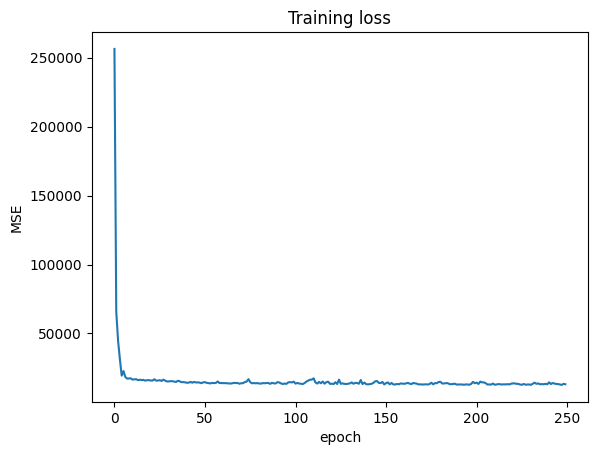

In [105]:
############################################################
# 6.  TRAIN
############################################################
EPOCHS = 250
batch  = 32
train_ld = DataLoader(train_ds, batch_size=batch, shuffle=True)
import matplotlib.pyplot as plt
loss_log = []
for ep in range(EPOCHS):
    model.train(); epoch_loss=0
    for xb,yb in train_ld:
        opt.zero_grad()
        out = model(xb)
        loss = lossf(out, yb)
        loss.backward(); opt.step()
        epoch_loss += loss.item()*len(xb)
    loss_log.append(epoch_loss/len(train_ds))

plt.plot(loss_log); plt.xlabel("epoch"); plt.ylabel("MSE");
plt.title("Training loss");


In [106]:
############################################################
# 7.  EVALUATION
############################################################
model.eval()
with torch.no_grad():
    pred_tr = model(to_tensor(X_tr)).squeeze().numpy()
    pred_te = model(to_tensor(X_te)).squeeze().numpy()

from sklearn.metrics import mean_absolute_error, r2_score
def stats(true, pred, name):
    print(f"{name:5s}  MAE = {mean_absolute_error(true,pred):.2f} h   "
          f"R² = {r2_score(true,pred):.3f}")
stats(y_tr.squeeze(), pred_tr, "Train")
stats(y_te.squeeze(), pred_te, "Test")


Train  MAE = 93.14 h   R² = 0.814
Test   MAE = 100.77 h   R² = 0.768


In [107]:
df_acc_m_T=df_acc_m_T.reset_index()
df_acc_m_T['Day']=df_acc_m_T.index
df_acc_m_T

,level_0,index,date,acc_Tmax,acc_Tmin,acc_Tmax_n_Tmin,Percipitation,S_RAD,Day
0,0,0,0,259.6,33.6,146.60,17.0,17.0,0
1,1,1,29,223.2,-4.0,109.60,21.7,21.7,1
2,2,2,58,411.2,110.9,261.05,37.7,37.7,2
3,3,3,87,589.1,236.1,412.60,6.6,6.6,3
4,4,4,116,731.5,399.3,565.40,26.6,26.6,4
...,...,...,...,...,...,...,...,...,...
236,236,236,6844,662.3,387.9,525.10,34.1,34.1,236
237,237,237,6873,595.8,329.6,462.70,19.2,19.2,237
238,238,238,6902,407.9,163.1,285.50,24.7,24.7,238
239,239,239,6931,348.3,56.3,202.30,31.6,31.6,239


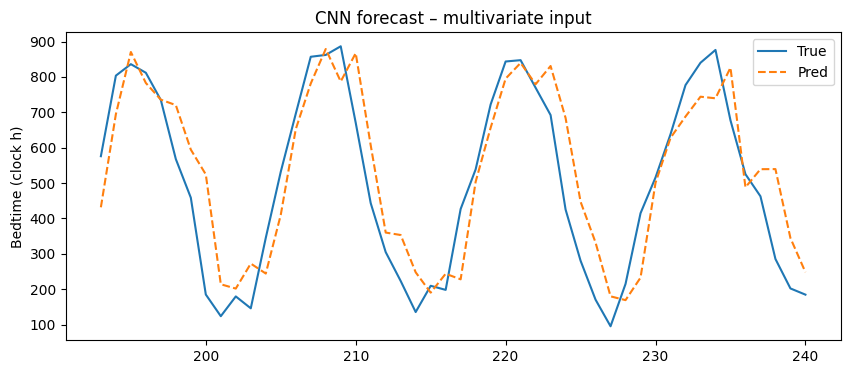

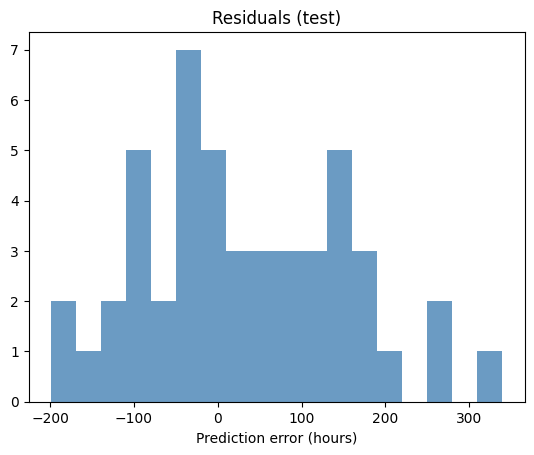

In [108]:
############################################################
# 8.  VISUALISE  true vs predicted (test split)
############################################################
t_idx = df_acc_m_T.Day[WINDOW+split:]               # align with test points
plt.figure(figsize=(10,4))
plt.plot(t_idx, y_te.squeeze(),  label="True")
plt.plot(t_idx, pred_te, '--',   label="Pred")
plt.ylabel("Bedtime (clock h)")
plt.title("CNN forecast – multivariate input")
plt.legend(); plt.show()

# Residuals
res = pred_te - y_te.squeeze()
plt.hist(res, bins=18, color="steelblue", alpha=.8)
plt.xlabel("Prediction error (hours)")
plt.title("Residuals (test)"); plt.show()
